In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [34]:
col=['Insurance_company','Expiry_date']

In [64]:
df_train=train.drop(col,axis=1);
df_test=test.drop(col,axis=1);

In [65]:
df_train.set_index('Image_path',inplace=True)
df_test.set_index('Image_path',inplace=True)

In [85]:
X_train=df_train.iloc[:,0:3]
y_class=df_train['Condition']
y_req=df_train['Amount'] 

#test
X_test=df_test.iloc[:,0:3]

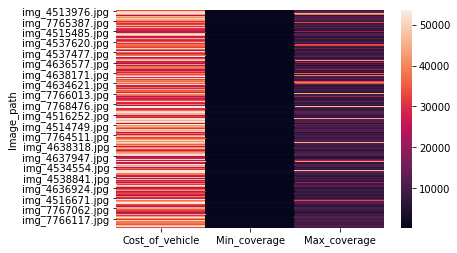

In [81]:
sns.heatmap(X_train)#null values are present in cost of vehicle and max_cov col

In [82]:
X_train['Cost_of_vehicle'].isnull().sum()
X_train['Max_coverage'].isnull().sum()#dono col m 89 values empty h

89

In [96]:
X_train.Cost_of_vehicle.fillna(X_train['Cost_of_vehicle'].mean(),inplace=True)
X_train.Max_coverage.fillna(X_train['Max_coverage'].mean(),inplace=True) 
X_train.Min_coverage.fillna(X_train['Min_coverage'].mean(),inplace=True) 
#test data doesn't contain any null value

 ##  Standard scaling

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [99]:
y_req.fillna(0,inplace=True)

In [100]:
  from sklearn.linear_model import LinearRegression

In [101]:
lm=LinearRegression()

In [102]:
lm.fit(X_train,y_req)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_req_predict=lm.predict(X_test)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
lr=LogisticRegression().fit(X_train,y_class)

In [108]:
y_class_predict=lr.predict(X_test)

In [121]:
data = [y_class_predict,y_req_predict]
headers = ["Condition","Amount"]
df3 = pd.concat(data, axis=1, keys=headers)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [124]:
dft=pd.read_csv('test.csv')

In [125]:
submission = pd.DataFrame({'Image_path':dft['Image_path'],'Condition':y_class_predict,'Amount':y_req_predict})
submission.head() 

,Image_path,Condition,Amount
0,img_4538519.jpg,1,4308.059720
1,img_7766002.jpg,1,4330.346413
2,img_4637390.jpg,1,4403.370896
3,img_4516108.jpg,1,4414.751335
4,img_4517008.jpg,1,4389.145347


In [126]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
